## K-means clustering

El concepto es dividir un conjunto de datos en $k$ grupos, tomando como criterio minimizar la suma de las distancias euclídeas al centro de cada grupo.

El método consiste en imponer $k$ centros $m_i$ y desplazarlos con algun método hasta lograr minimizar las distancias:

## $$\sum_{i=1}^{k} \sum_{\forall x_j \in i} \left| \left| x_j-m_i \right|\right|^2$$

Un algoritmo que se podria aplicar es el siguiente:

- Se incializan los $k$ centros con posiciones al azar
- Se asignan los puntos $x_j$ del conjunto de datos a cada centro segun cual tenga la menor distancia euclídea
- Se recalcula la posición de los centros como el promedio de la posición de todos los puntos asignados al mismo
- Se sigue iterando volviendo al punto dos. El algoritmo converge cuando ya ningun punto cambie de centro asignado de un paso al otro.

In [ ]:
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans

In [86]:
iris = pd.read_csv('../datasets/Iris.csv')
print(iris.shape)
iris.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
iris = iris.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


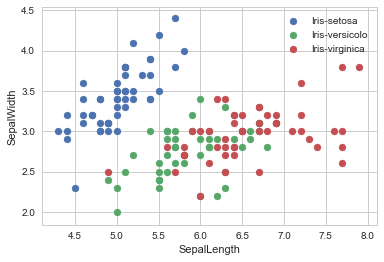

In [36]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:100].SepalLengthCm, iris[51:100].SepalWidthCm, label='Iris-versicolo')
plt.scatter(iris[101:].SepalLengthCm, iris[101:].SepalWidthCm, label='Iris-virginica')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

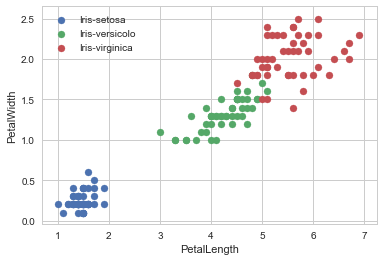

In [37]:
plt.scatter(iris[:50].PetalLengthCm, iris[:50].PetalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:100].PetalLengthCm, iris[51:100].PetalWidthCm, label='Iris-versicolo')
plt.scatter(iris[101:].PetalLengthCm, iris[101:].PetalWidthCm, label='Iris-virginica')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend(loc='best')

In [88]:
iris = iris.drop(['Id', 'Species'], axis=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroid)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


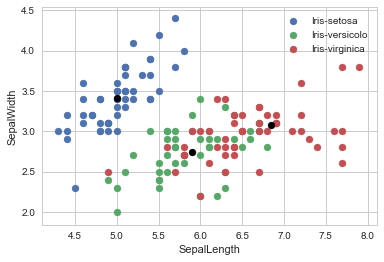

In [97]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:100].SepalLengthCm, iris[51:100].SepalWidthCm, label='Iris-versicolo')
plt.scatter(iris[101:].SepalLengthCm, iris[101:].SepalWidthCm, label='Iris-virginica')
plt.scatter(centroid[0][0], centroid[0][1], color='black')
plt.scatter(centroid[1][0], centroid[1][1], color='black')
plt.scatter(centroid[2][0], centroid[2][1], color='black')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

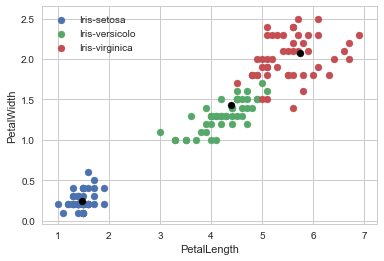

In [98]:
plt.scatter(iris[:50].PetalLengthCm, iris[:50].PetalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:100].PetalLengthCm, iris[51:100].PetalWidthCm, label='Iris-versicolo')
plt.scatter(iris[101:].PetalLengthCm, iris[101:].PetalWidthCm, label='Iris-virginica')
plt.scatter(centroid[0][2], centroid[0][3], color='black')
plt.scatter(centroid[1][2], centroid[1][3], color='black')
plt.scatter(centroid[2][2], centroid[2][3], color='black')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend(loc='best')